## 🔰*============ Summary Overview =============*🔰

1. **Addressing multiclass classification**
  * dataset: [fashion_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist)
  * create an unscaled and scaled dataset
  * split test data into validation set and a final test set

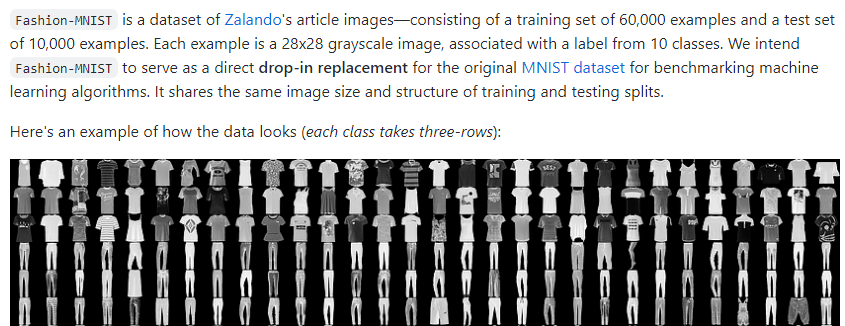

    

2.   **Build a Simple Model**
  *  Run with unscaled data for illustration purposes.
  *  Run with scaled data to view effects on model performance. 
  *  Optional: Run with One-Hot-Encoded labels.

3.   **Find an Optimal Learning Rate**
  * It will be found that the default learning rate is already very good.
  * A slightly better value will be used to retrain the model.

4.  **Evaluate the Model**
  * Create a confusion matrix.
  * View histogram of items most likely to be misclassified.
  * View samples of misclassified items along with their false predictions. 

5. **Visualizing the Input Layer**
  * Visualize input-layer pixel weights.
  * Visualize how each neuron 'views' a particular item.

## 🔰*============== Getting Started ===================*🔰

In [126]:
import numpy as np
import pandas as pd
import tensorflow as tf
from random import choices
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist

In [127]:
#---- Dataset is presplit into training & test sets:
(x_train,y_train), (x_test, y_test) = fashion_mnist.load_data()

In [128]:
#---- Review Raw data:
print(f'Shape: {x_train[0].shape}')
print(y_train[0])
print(x_train[0][0:10,:])

Shape: (28, 28)
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [129]:
class_names = ("T-shirt/top","Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_boot")

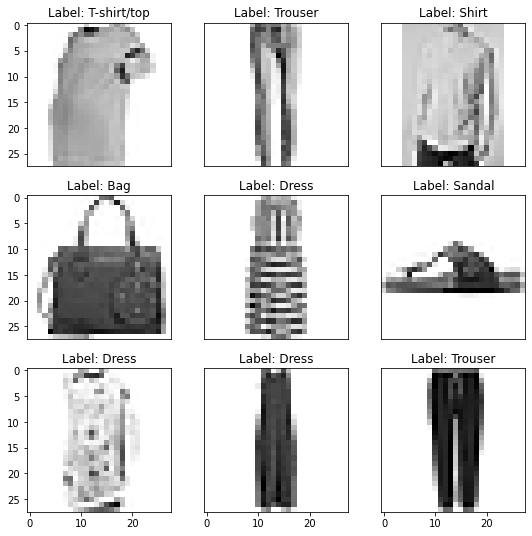

In [9]:
#----- Review Images:
plt.figure(figsize=(9,9))

subplot = 331
n_samples = x_train.shape[0]
r_indxs = choices(range(1,n_samples),k=9)

for ax_idx,item_idx in enumerate(r_indxs):
  ax = plt.subplot(subplot + ax_idx)
  plt.imshow(x_train[item_idx], cmap='gray_r')
  t = ax.set_title(f'Label: {class_names[y_train[item_idx]]}')
  if ax_idx < 6:
    ax.set_xticks([])
  if (ax_idx % 3):
    ax.set_yticks([])


In [15]:
#@title Helper Functions: Show_Model, Training_Plot, Visualize, BuildCompileFit, ContinueTraining
#---------------Build some helper functions:
def Show_Model(model):
    """
      Will provide a visual representation of model,
      showing layers, and input/output shapes. 
    """
    file_name = f'{model.name}.png'
    plot = plot_model(model,
                      to_file=file_name,
                      show_layer_activations=True,
                      show_shapes=True)
    
    plt.figure(figsize=(8,8))
    image = mpimg.imread(file_name)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])  

def Training_Plot(history):
  """
    Will plot results from model training:
      loss,accuracy vs epochs
  """
  pd.DataFrame(history.history).plot(figsize=(10,6))
  plt.ylabel('loss')
  plt.xlabel('epochs')  

def Visualize_Data(x,y):
  """
    Will be used to show the pattern of data
  """
  #--- Create a DataFrame
  df = pd.DataFrame({'X0':x[:,0],
                    'X1':x[:,1],
                    'label':y})

  print(df['label'].value_counts(normalize=True)) 

  #--- Visualize Data:
  ax = df.plot(x='X0',
               y='X1',
               c='label',
               kind='scatter',
               cmap=plt.cm.RdYlBu,
               s=1,
               legend=True,
               figsize=(8,6))

def BuildCompileFit(Xdata,Ydata,layers,loss,optimizer,callbacks,metrics,Vdata,
                    rndSeed,epochs,verbose=0,show_model=False):
  
  #--- Set Random Seed
  tf.random.set_seed(rndSeed)

  #--- Build Model
  w, h = Xdata[0].shape
  layers2 = [tf.keras.layers.InputLayer(input_shape=(w,h),
                                        name='InputLayer'),
             tf.keras.layers.Flatten(input_shape=(w, h),
                                     name='Flatten_Layer')]
  layers2.extend(layers)
  model = tf.keras.Sequential(layers2)

  #--- Compile Model
  model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)
  
  if show_model:
     Show_Model(model)

  #--- Fit Model:
  history=model.fit(Xdata,Ydata,
                    epochs=epochs,
                    callbacks=callbacks,
                    validation_data=Vdata,
                    verbose=verbose)


  #--- Evaluate Model
  print('\nEvaluation: ',model.evaluate(Xdata,Ydata),'\n')              

  #------------------View Loss/Training Curve:
  Training_Plot(history)

  return model,history


def ContinueTraining(Xdata,Ydata,model,callbacks,epochs,verbose=0):

  #--- Fit Model:
  history=model.fit(Xdata,Ydata,
                    epochs=epochs,
                    callbacks=callbacks,
                    verbose=verbose)

  #--- Evaluate Model
  print('\nEvaluation: ',model.evaluate(Xdata,Ydata),'\n')              

  #------------------View Loss/Training Curve:
  Training_Plot(history)

  return model, history

## 🔰*============== Scale/Split Data ===================*🔰

In [130]:
#---- Scale Data:
train_scale = tf.cast(x_train.max().max(),dtype='float32')
test_scale = tf.cast(x_test.max().max(),dtype='float32')

#--- train & test data should always be scaled seperatly, otherwise it can create information leak.
x_train_s = tf.divide(x_train,train_scale)
x_test_s = tf.divide(x_test,test_scale)

print(f'Min: {tf.reduce_min(x_train_s)}')
print(f'Max: {tf.reduce_max(x_train_s)}')

Min: 0.0
Max: 1.0


In [131]:
#---- Split Test Dataset into a Validation Data Set & Final Test Set:
val_pct = 0.25
val_idx = int(x_test_s.shape[0]*val_pct)

#----- Validation Set:
x_validation = x_test[0:val_idx]          # Unscaled data
x_validation_s = x_test_s[0:val_idx]      # Scaled data
y_validation = y_test[0:val_idx]

#---- Final Test Set:
x_ftest_s = x_test_s[val_idx:]
y_ftest = y_test[val_idx:]

x_validation_s.shape, x_ftest_s.shape

(TensorShape([2500, 28, 28]), TensorShape([7500, 28, 28]))

## 🔰*============== Building a Model ===================*🔰

In [132]:
#@title Helper Functions: OHE

def OHE(Ytrain,Yvalidation,class_names,ohe=True):
  """
    Used to illustrate method for One-Hot-Encoding Labels.
    If One-Hot-Encoding is required,
    provides the correct loss function & encoded labels.
  """

  if ohe:
    n_classes = len(class_names)
    loss_func = tf.keras.losses.CategoricalCrossentropy()       #Used when labels are One-Hot-Encoded
    y_train_e = tf.one_hot(Ytrain,depth=n_classes)
    y_validation_e = tf.one_hot(Yvalidation,depth=n_classes)

  else:
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy() #Used when labels are integer encoded
    y_train_e = Ytrain
    y_validation_e = Yvalidation

  return y_train_e, y_validation_e, loss_func


In [307]:
#------ Establish a baseline of performance (random guessing):
n_classes = len(class_names)
bline_acc = 1/n_classes
print(f" Baseline Accuracy: {bline_acc}")

 Baseline Accuracy: 0.1


## ❗ As Reference run Model training on **unscaled data**:

1875/1875 [==============================] - 4s 2ms/step - loss: 1.5640 - accuracy: 0.3294

Evaluation:  [1.5639817714691162, 0.32938334345817566] 



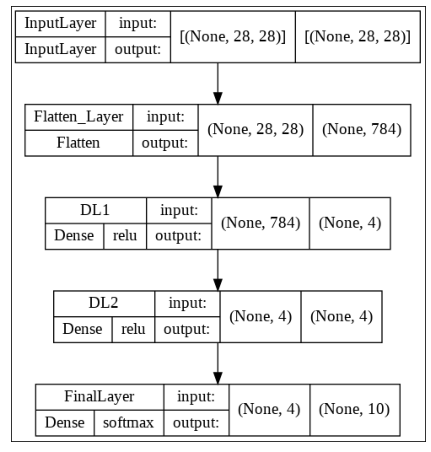

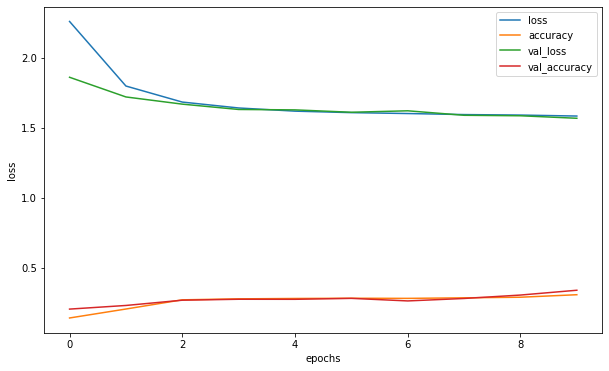

In [16]:
#--- Create Layers
layers = [Dense(4, activation='relu',name='DL1'),
          Dense(4, activation='relu',name='DL2'),
          Dense(10,activation='softmax',name='FinalLayer')
         ]


#--- (Optional) One Hot Encoding: 
y_train_e, y_validation_e, loss_func = OHE(Ytrain=y_train,
                                           Yvalidation=y_validation,
                                           class_names=class_names,
                                           ohe=True)


#--- Build, Compile, Fit, Evaluate:
model_1,history1 = BuildCompileFit(Xdata=x_train,
                                   Ydata=y_train_e,
                                   layers=layers,
                                   loss=loss_func,
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=['accuracy'],
                                   callbacks=None,
                                   Vdata=(x_validation,y_validation_e),
                                   epochs=10,
                                   rndSeed=123,
                                   verbose=False,
                                   show_model=True)

### ❌ Model performs better than random guessing baseline however, <br> the model is still **peforming poorly** *Accuracy ~= 33%*. <br> The loss curve seems to be tapering quickly and may not benefit from prolonged training.

## ✅ Train Model on **scaled data**:

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5192 - accuracy: 0.8217

Evaluation:  [0.5191859006881714, 0.8216999769210815] 



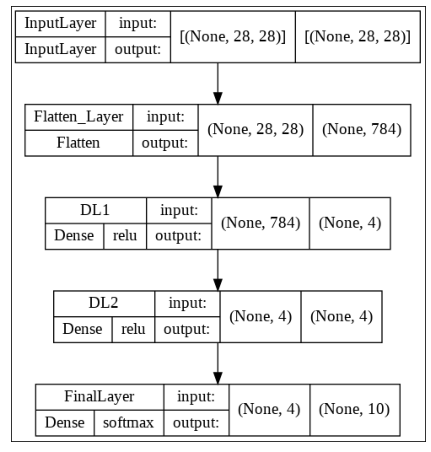

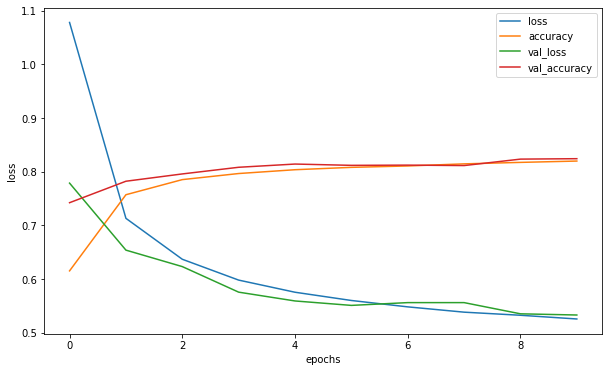

In [17]:
#--- Create Layers
layers = [Dense(4, activation='relu',name='DL1'),
          Dense(4, activation='relu',name='DL2'),
          Dense(10,activation='softmax',name='FinalLayer')
         ]



#--- (Optional) One Hot Encoding: 
y_train_e, y_validation_e, loss_func = OHE(Ytrain=y_train,
                                           Yvalidation=y_validation,
                                           class_names=class_names,
                                           ohe=True)


#--- Build, Compile, Fit, Evaluate:
model_2,history2 = BuildCompileFit(Xdata=x_train_s,
                                   Ydata=y_train_e,
                                   layers=layers,
                                   loss=loss_func,
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=['accuracy'],
                                   callbacks=None,
                                   Vdata=(x_validation_s,y_validation_e),
                                   epochs=10,
                                   rndSeed=123,
                                   verbose=False,
                                   show_model=True)

## ⚡ Even after only 10 epochs with a very simple model,<br>&emsp;&ensp;the model performs **significantly better!** *Accuracy ~= 82%*

## 🔑 **Note** Model Comparison Caveats:
  * Slight changes to setups can produce **dramatic** differences in performance.
  * Models **trained on different data** must be **trained with same architecture**.
  * Models **trained with different architecture** must be **trained on the same data**.

## 🔰*============ Find an Optimal Learning Rate ================*🔰

In [18]:
#@title New Helper Function: Find_Optimal_LR
def Find_Optimal_LR(hist,offsetFactor):
  #----- Find the Optimal Learning Rate: 
  loss = np.array(hist.history['loss'])
  idx_of_min_loss = np.where(loss == loss.min())[0][0]
  best_lr = hist.history['lr'][idx_of_min_loss]
  optimal_lr = best_lr * offsetFactor

  print(f'Best LR: {best_lr:5.4f}')
  print(f'Optimal: {optimal_lr:5.4f}')
  #-------------------------- Loss vs Learning Rate Curve
  plt.figure(figsize=(10,6))
  plt.semilogx(hist.history['lr'],hist.history['loss'])

  #--- Learning Rate: 
  plt.axvline(x=best_lr,c='red',ls='--',lw=0.75,label='best')           #--Lowest point on loss curve
  plt.axvline(x=optimal_lr,c='orange',ls='--',lw=0.75,label='optimal')     #--Value to use for training

  plt.xlabel('Learning Rate')
  plt.ylabel('Loss')
  plt.legend()
  return optimal_lr

1875/1875 [==============================] - 5s 2ms/step - loss: 1.7988 - accuracy: 0.1996

Evaluation:  [1.7988016605377197, 0.19958333671092987] 



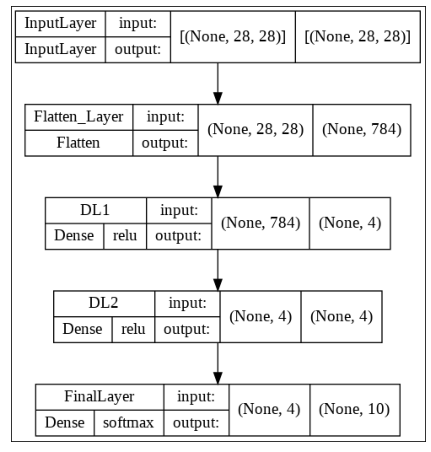

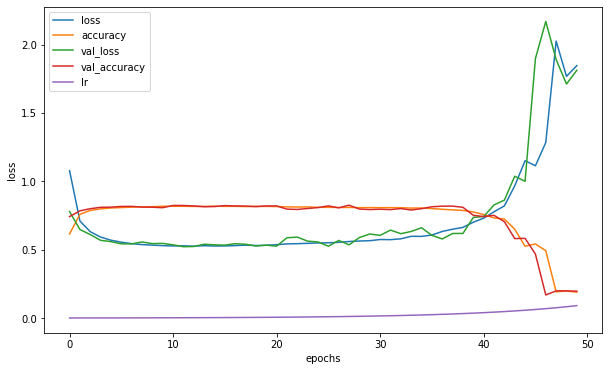

In [19]:
#--- Create Layers
layers = [Dense(4, activation='relu',name='DL1'),
          Dense(4, activation='relu',name='DL2'),
          Dense(10,activation='softmax',name='FinalLayer')
         ]



#--- (Optional) One Hot Encoding: 
y_train_e, y_validation_e, loss_func = OHE(Ytrain=y_train,
                                           Yvalidation=y_validation,
                                           class_names=class_names,
                                           ohe=True)

#--- Learning Rate Callback:
lr_scheduler = [tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-3 * 10**(epoch/25))]


#--- Build, Compile, Fit, Evaluate:
model_3,history3 = BuildCompileFit(Xdata=x_train_s,
                                   Ydata=y_train_e,
                                   layers=layers,
                                   loss=loss_func,
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=['accuracy'],
                                   callbacks=lr_scheduler,
                                   Vdata=(x_validation_s,y_validation_e),
                                   epochs=50,
                                   rndSeed=123,
                                   verbose=False,
                                   show_model=True)

Best LR: 0.0030
Optimal: 0.0023


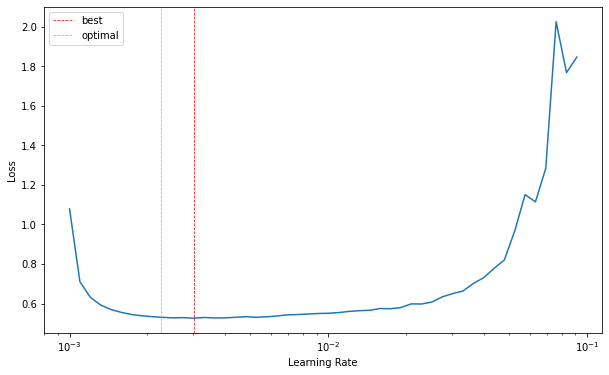

In [20]:
#---- Find the best learning rate, 75% offset used for optimal value to pass during training
optimal_lr = Find_Optimal_LR(hist=history3,
                             offsetFactor=0.75)

### ⚡ Adams default learning rate (0.001) already seems to be a very good choice since<br>&emsp;&ensp; the 'best' learning rate is (~ 0.003). 

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4420 - accuracy: 0.8455

Evaluation:  [0.44202908873558044, 0.845466673374176] 



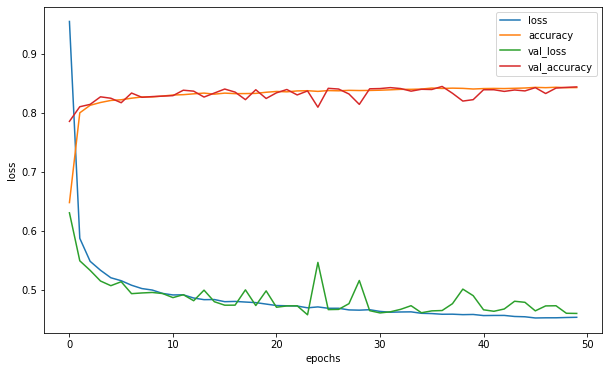

In [136]:
#--- Create Layers
layers = [Dense(4, activation='relu',name='DL1'),
          Dense(4, activation='relu',name='DL2'),
          Dense(10,activation='softmax',name='FinalLayer')
         ]



#--- (Optional) One Hot Encoding: 
y_train_e, y_validation_e, loss_func = OHE(Ytrain=y_train,
                                           Yvalidation=y_validation,
                                           class_names=class_names,
                                           ohe=True)


#--- Build, Compile, Fit, Evaluate:
model_4,history4 = BuildCompileFit(Xdata=x_train_s,
                                   Ydata=y_train_e,
                                   layers=layers,
                                   loss=loss_func,
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=optimal_lr),
                                   metrics=['accuracy'],
                                   callbacks=None,
                                   Vdata=(x_validation_s,y_validation_e),
                                   epochs=50,
                                   rndSeed=123,
                                   verbose=False,
                                   show_model=False)

## 🔑 With the added training time and a better learning rate the model sees a <br>&emsp;&ensp;slight improvement from 82% to 85%.

## 🔰*============ Evaluate the Model Using a Confusion Matrix ================*🔰

In [137]:
from sklearn.metrics import confusion_matrix
from itertools import product

In [138]:
#@title Helper Functions: Plot_CM
def _Get_text_color(v_int,v_norm,thresh):
    """
      v_int: value as integer
      v_norm: normalized value (float)
      thresh: cutoff value for text color
    """
    v_pct = f"{v_norm*100:.1f}%"
    text = f"{v_int}\n({v_pct})"
    color = 'white' if v_int > thresh else 'black'
    return text,color

def _Plot_Text(cm,cm_norm,txt_size=15):
  """ 
    Will show confusion matrix values on
    confusion matrix plot, and will color by value.
  """
  #--- 
  x_range = range(cm.shape[0])
  y_range = range(cm.shape[1])

  #--- Set Color Thresholds:
  threshold = (cm.max()+cm.min())/2

  for x,y in product(x_range,y_range):
    text,color = _Get_text_color(v_int=cm[x,y],
                                 v_norm=cm_norm[x,y],
                                 thresh=threshold)
    plt.text(y,x,text,
             ha='center',  #horizontal alignment
             color = color,
             size=txt_size)

def _Format_Fig(ax,n_labels):
    #--- Classes:
  classes = False
  labels = classes if classes else np.arange(n_labels) #cm.shape[0]

  ax.set(title='Confusion Matrix',
         xlabel='Predicted Labels',
         ylabel='True Labels',
         xticks=np.arange(n_labels),
         yticks=np.arange(n_labels),
         xticklabels=labels,
         yticklabels=labels)

  #--- Set x-axis labels to bottom:
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #--- Adjust label size:
  ax.xaxis.label.set_size(15)
  ax.yaxis.label.set_size(15)
  ax.title.set_size(15)


def Plot_CM(y,y_pred,figsize=(6,6),txt_size=15):

  #--- Create Confusion Matrix
  cm = confusion_matrix(y,y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)
  n_classes = cm.shape[0]

  #--- Plot Confusion Matrix
  fig,ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm_norm,
                   cmap=plt.cm.Blues,
                   vmax=1.0,
                   vmin=0.0,
                   alpha=.98)
  
  fig.colorbar(cax,
               fraction = 1/figsize[0],
               aspect=figsize[0])



  #--- Format the Figure
  _Format_Fig(ax=ax,
              n_labels=n_classes)
  

  #--- Plot Text:
  _Plot_Text(cm,cm_norm,txt_size)

  return cm_norm

In [139]:
#-------------------------------Evaluate the Final Test Set:

#--- Make Predictions:
y_pred_e = model_4.predict(x_ftest_s).round().squeeze()   #--Results are one hot encoded
y_ftest_e = tf.one_hot(y_ftest,depth=len(class_names))


#--- Evaluate the Accuracy:
Acc = tf.keras.metrics.Accuracy()
print(f'N samples: {x_ftest_s.shape[0]}')
print(f'Accuracy: {Acc(y_ftest_e,y_pred_e)*100:4.2f}%')

N samples: 7500
Accuracy: 96.52%


## ⚡ Accuracy on the final test set is ~ 97% out of 7500 samples!

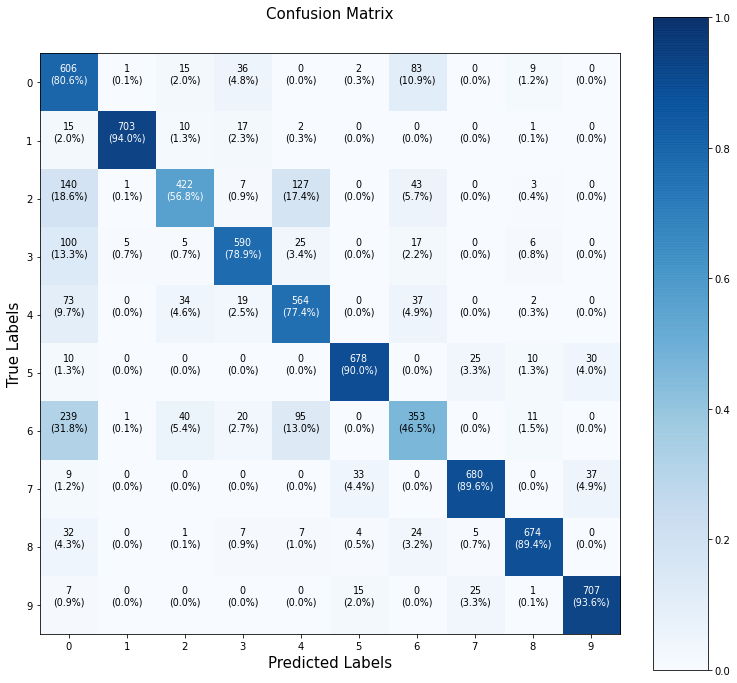

In [140]:
#--- Confusion Matrix Requires integer labels (not OHE):
y_pred = tf.argmax(y_pred_e,axis=1).numpy()                     #<-- Use this if not OHE
cm_norm = Plot_CM(y_ftest,y_pred,figsize=(12,12),txt_size=9.5)

In [175]:
#----------------- Find Misclassified Items:
y_false = y_ftest[y_ftest != y_pred]
y_false_pred = y_pred[y_ftest != y_pred]
x_false = x_ftest_s[y_ftest != y_pred]

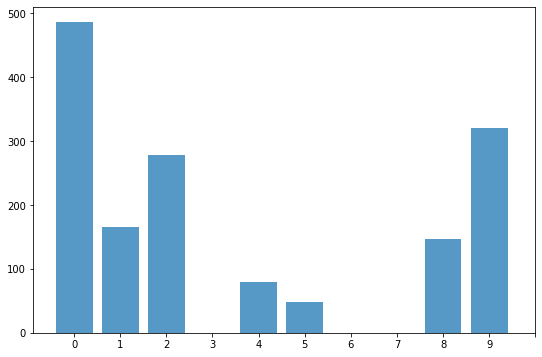

In [185]:
#----------------- Show Distribution of Misclassified Items:
plt.figure(figsize=(9,6))

h = plt.hist(y_ftest[y_false],
             alpha=0.75, align='left', rwidth=0.80)

ticks = plt.xticks(ticks= h[1],
                   labels=range(0,10))

### Review Images:

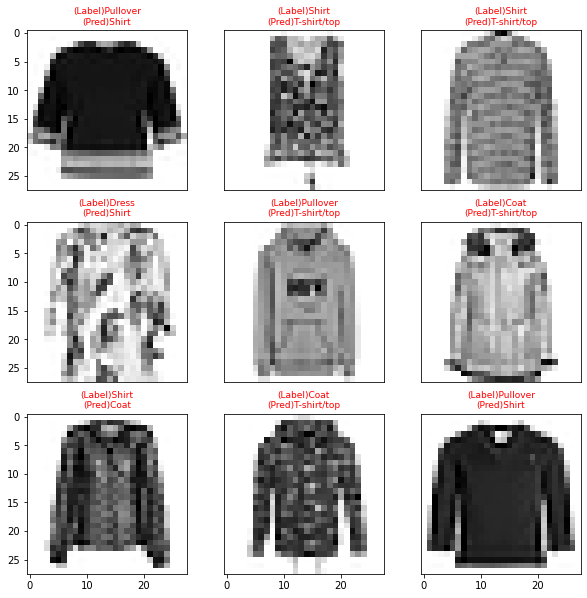

In [308]:
#----------------------------- Review Images of Misclassified Items:
#---- Setup:
subplot = 331
n_samples = x_false.shape[0]
r_indxs = choices(range(1,n_samples), k=9)

#------ Plot the Images
plt.figure(figsize=(10,10))
for ax_idx, item_idx in enumerate(r_indxs):
  ax = plt.subplot(subplot + ax_idx)
  plt.imshow(x_false[item_idx],
             cmap='gray_r')
  
  #----- Format Plot:
  label = f'(Label){class_names[y_false[item_idx]]}\n(Pred){class_names[y_false_pred[item_idx]]}'
  t = ax.set_title(label=label,
                   fontsize=9,
                   color='red')

  if ax_idx < 6:
    ax.set_xticks([])
  if (ax_idx % 3):
    ax.set_yticks([])

## 🔰*========== Visualize Input Layer Pixel Weights ============*🔰

In [362]:
#@title Helper Functions: InvestigateLayer, show_neuron_pixel_weights, show_item_neuron_view
import matplotlib as mpl
def investigate_layer_weights(model):
  #----- Investigate Layer 1:
  weights, biases = model.layers[1].get_weights()
  print(f'layer shape: {weights.shape}')
  print(f'layer  min    max')
  for i in range(0,4):
    print(f'{" "*2}{i}{" "*2}{weights[:,i].min():5.3f}, {weights[:,i].max():5.3f}')
  
  return weights,biases

def show_neuron_pixel_weights(weights):
  fig = plt.figure(figsize=(12,12))

  for i in range(0,4):
    ax = plt.subplot(221+i)
    min,max = weights[:,i].min(), weights[:,i].max()
    im = plt.imshow(np.reshape(weights[:,i],(28,28)),
                    cmap=plt.cm.Spectral)
    
    plt.colorbar(fraction = 0.05, aspect=20)
    ax.set_title(f'Neuron {i}',fontsize=15)

  text = fig.suptitle("Layer1's Neurons Pixel Weights",y=0.94,fontsize=15)

def show_item_neuron_view(weights,item_idx,xdata,ydata,classes):
  
  label = classes[ydata[item_idx]]
  fig = plt.figure(figsize=(9,9))
  for i in range(0,4):
    ax = plt.subplot(221+i)
    min,max = weights[:,i].min(), weights[:,i].max()
    im = plt.imshow(np.reshape(weights[:,i],(28,28))*xdata[item_idx],
                    cmap=plt.cm.Spectral,
                    vmin=-2,
                    vmax=2)
    if (i==0) or (i==1):
      ax.set_xticks([])
    if (i==1) or (i==3):
      ax.set_yticks([])

    plt.colorbar(fraction = 0.03, aspect=30)
    ax.set_title(f'Neuron {i}',fontsize=8)

  text = fig.suptitle(f"Item Type: {label}",y=0.94,fontsize=12)

In [192]:
#--------- Review Model Summary:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten_Layer (Flatten)     (None, 784)               0         
                                                                 
 DL1 (Dense)                 (None, 4)                 3140      
                                                                 
 DL2 (Dense)                 (None, 4)                 20        
                                                                 
 FinalLayer (Dense)          (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [276]:
weights,biases = investigate_layer_weights(model_4)

layer shape: (784, 4)
layer  min    max
  0  -8.092, 3.808
  1  -5.940, 4.530
  2  -6.402, 5.511
  3  -3.106, 3.644


## 🔑 The figure below gives a sense of the importance each neuron places on each pixel in an image.

  * Note **inconsistent color scale**: Each Neuron has a different range on its weights, and a different skew neg vs pos
  * This **gives a sense of the relative importance** each neuron puts on each pixel, but not its 'absolute' importance.


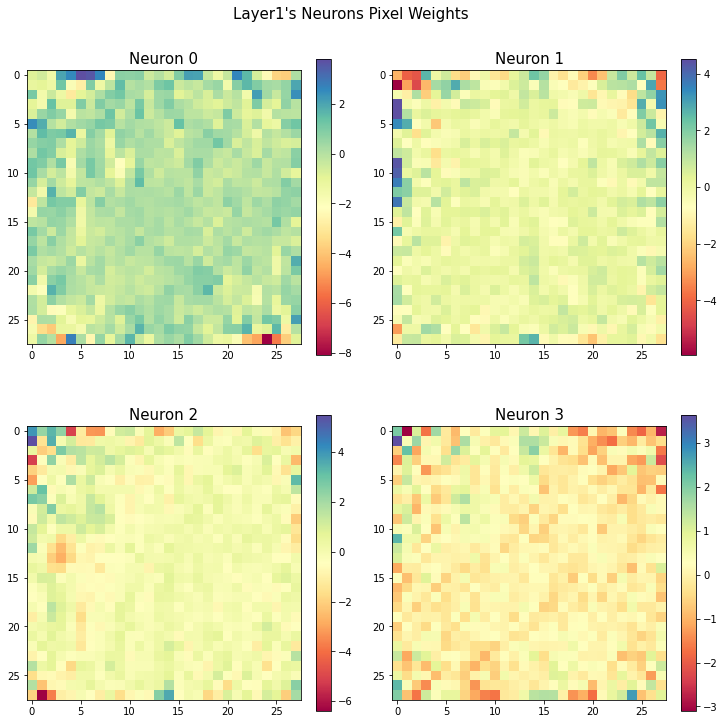

In [306]:
show_neuron_pixel_weights(weights)

## 🔑 Below gives a sense of how each neuron 'views' a particular item. 
  * Note the color scales are made consistent to give a better comparison between neurons.

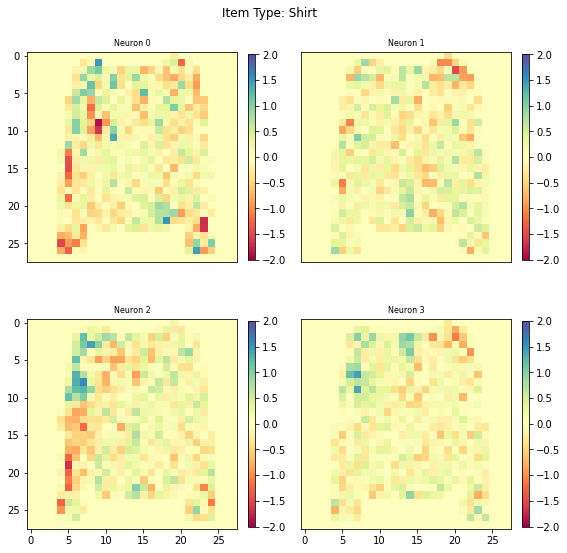

In [363]:
show_item_neuron_view(weights,
                      item_idx=0,
                      xdata=x_ftest_s,
                      ydata=y_ftest,
                      classes=class_names)

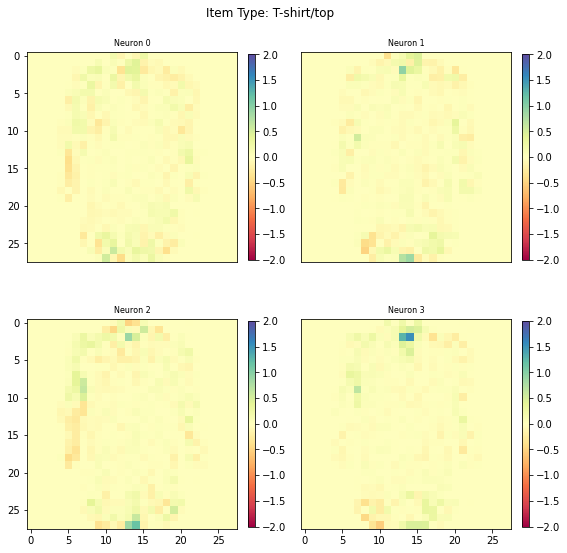

In [366]:
show_item_neuron_view(weights,
                      item_idx=6,
                      xdata=x_ftest_s,
                      ydata=y_ftest,
                      classes=class_names)

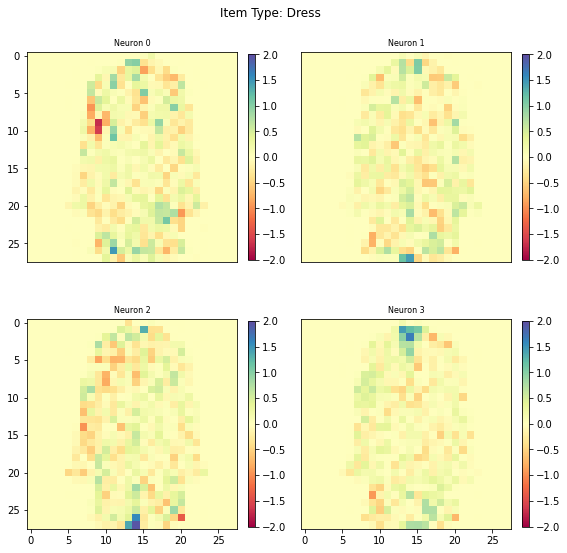

In [367]:
show_item_neuron_view(weights,
                      item_idx=7,
                      xdata=x_ftest_s,
                      ydata=y_ftest,
                      classes=class_names)

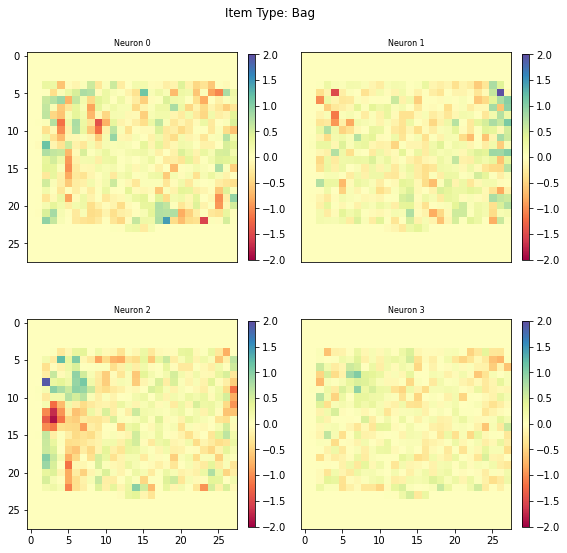

In [370]:
show_item_neuron_view(weights,
                      item_idx=10,
                      xdata=x_ftest_s,
                      ydata=y_ftest,
                      classes=class_names)

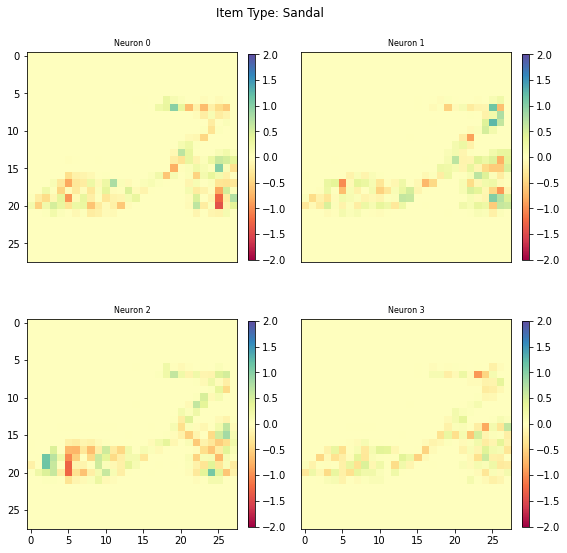

In [371]:
show_item_neuron_view(weights,
                      item_idx=11,
                      xdata=x_ftest_s,
                      ydata=y_ftest,
                      classes=class_names)

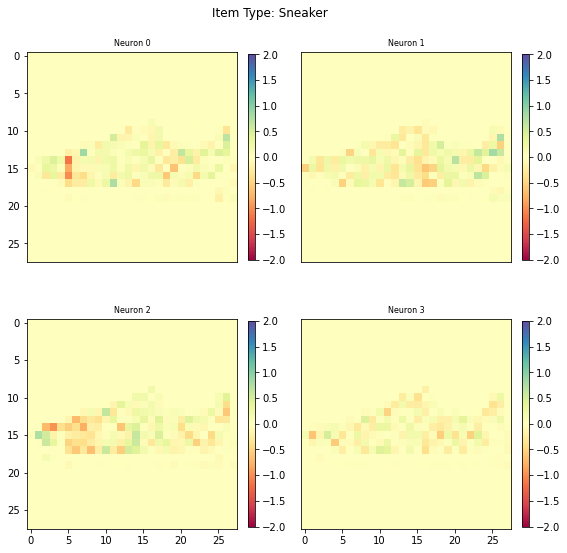

In [377]:
show_item_neuron_view(weights,
                      item_idx=16,
                      xdata=x_ftest_s,
                      ydata=y_ftest,
                      classes=class_names)

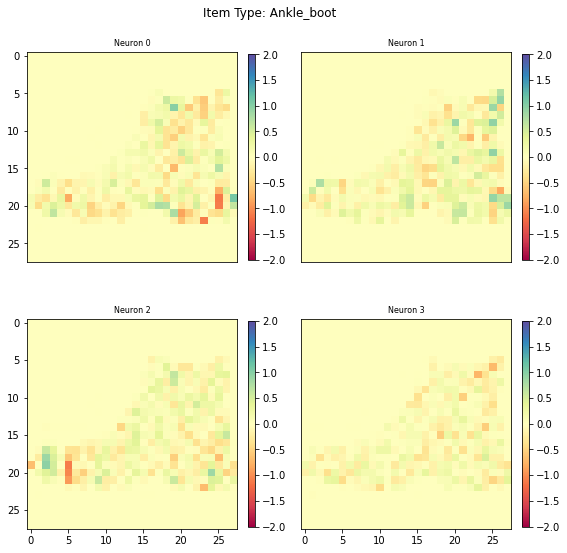

In [381]:
show_item_neuron_view(weights,
                      item_idx=20,
                      xdata=x_ftest_s,
                      ydata=y_ftest,
                      classes=class_names)